In [143]:
import pandas as pd
import numpy as np

In [144]:
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [145]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [147]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

Checking for Duplicate rows

In [148]:
df.duplicated().any()

False

Checking for Null values

In [149]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

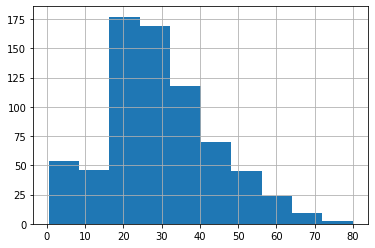

In [150]:
df['Age'].hist()

<AxesSubplot: >

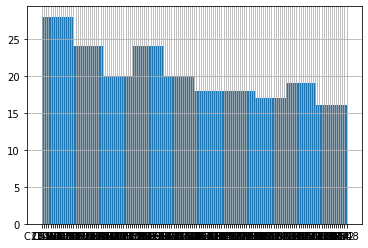

In [151]:
df['Cabin'].hist()

<AxesSubplot: >

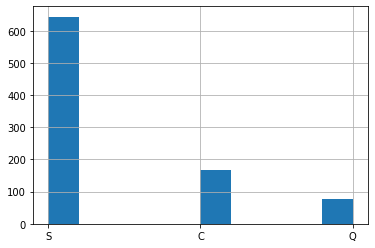

In [152]:
df['Embarked'].hist()

Method of filling:
Age : mean

Cabin : mode

Embarked : mode

In [153]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df['Cabin'].fillna(method='ffill', inplace=True)

In [154]:
#df.fillna(method='ffill', inplace=True)

In [155]:
df['Cabin'].value_counts()

G6             24
B78            21
C78            20
C23 C25 C27    19
C83            19
               ..
C90             1
C101            1
C62 C64         1
F G63           1
E10             1
Name: Cabin, Length: 147, dtype: int64

In [156]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       2
dtype: int64

list the count of female survivors

group data by Age & Cabin to find no of passengers in each group

group data by Sex & Survived and count no of passengers

In [214]:
df.groupby(['Sex','Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

In [205]:
df.groupby(['Age','Cabin'])['Age'].count()

Age    Cabin  
0.42   B96 B98    1
0.67   E121       1
0.75   B35        1
       E63        1
0.83   B28        1
                 ..
70.50  C110       1
71.00  A5         1
       C30        1
74.00  C92        1
80.00  A23        1
Name: Age, Length: 758, dtype: int64

In [232]:
df1 = df.groupby('Sex')['Sex'].count()
df1

Sex
female    314
male      577
Name: Sex, dtype: int64

In [226]:
df1['female']

314

In [237]:
#df.loc[(df['Sex']=='female') & df['Survived']==1].count()

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            233
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin          233
Embarked       231
dtype: int64